In [2]:
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt
    from google.colab import files
    uploaded_Decktop = files.upload()

Saving 10 - wen el kontraastttt.jpg to 10 - wen el kontraastttt.jpg


Text(0.5, 1.0, 'grey scale')

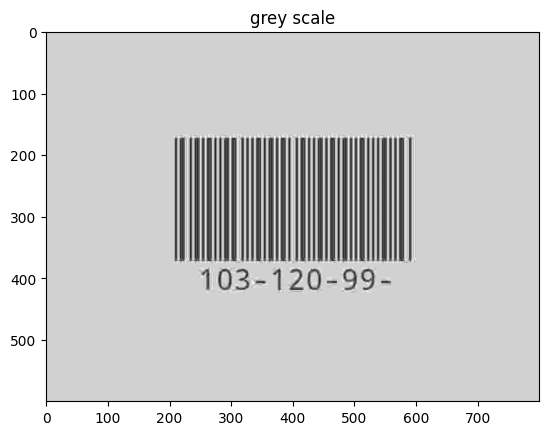

In [3]:
#put the uploaded image
img_filename = next(iter(uploaded_Decktop))
img = cv2.imread(img_filename)

# Convert the image from color to Grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray , cmap='gray')
plt.title("grey scale")

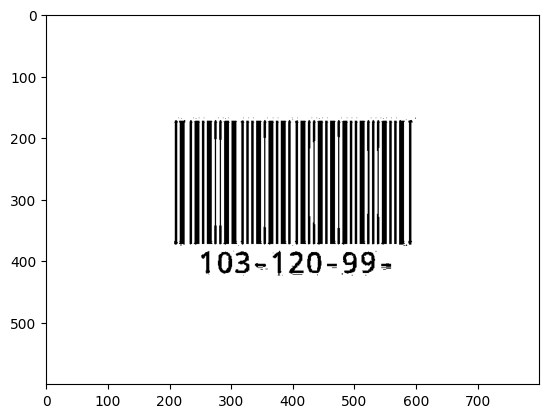

In [79]:

# otus threshold(much better)
#ret, img_thresholded = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
#plt.imshow(img_thresholded, cmap='gray')
#plt.title("thresholded")


#adaptive
img_thresholded = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 111, 1)
plt.imshow(img_thresholded, cmap='gray')



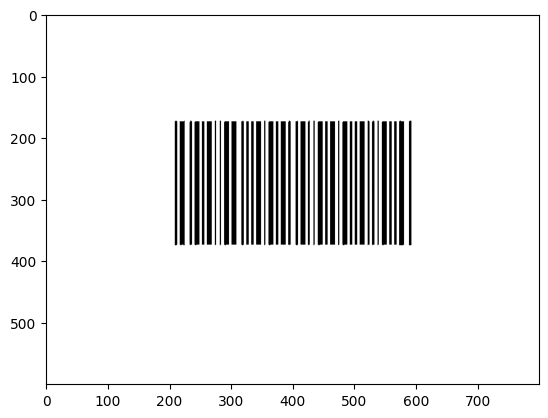

In [96]:
        kernel = np.ones((150, 1), np.uint8)
        dilated_image = cv2.dilate(img_thresholded, kernel, iterations=1)
        processed_image = cv2.erode(dilated_image, kernel, iterations=1)
        plt.imshow(processed_image, cmap='gray')


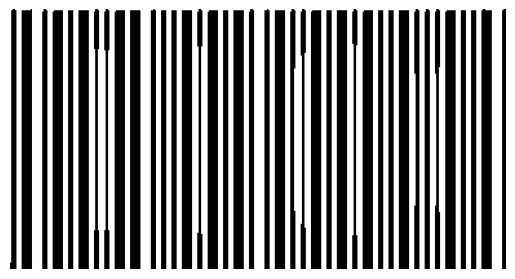

In [91]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def cropped_image(image):
    # Use Canny edge detection
    edges = cv2.Canny(image, 50, 150)
    # Detect vertical lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=197, maxLineGap=10)

    min_x, max_x, min_y, max_y = float('inf'), -float('inf'), float('inf'), -float('inf')

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Vertical lines: x1 == x2 or nearly vertical
            if abs(x1 - x2) < 10:
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)
            elif abs(y1 - y2) < 10:  # Horizontal lines
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)

    # Check if lines were found and if coordinates are valid
    if min_x != float('inf') and max_x != -float('inf') and min_y != float('inf') and max_y != -float('inf'):
        return image[min_y:max_y, min_x:max_x]
    else:
        print("No valid lines detected")
        return image  # Return the original image if no valid lines were detected

# Assuming 'img_gray' is a grayscale image
cropped_img = cropped_image(processed_image)
plt.imshow(cropped_img, cmap='gray')
plt.axis('off')
plt.show()
